<h1 align="center">Assignment 2</h1>
<h2 align="center">Programming Machine Learning Applications [DSC 478]</h2>
<h3 align="center">Jonesh Shrestha (2222011)</h3>

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. **K-Nearest-Neighbor (KNN) classification** on Newsgroups.

#### a. **[5 pts]** Load the data sets, including the train and test matrices as well as the train and test labels. Show the top 20 terms in the decreasing order of total training frequency (total number of occurences of the term across all documents in the training data). Then plot the distribtution of term frequencies in the training data (using a line plot similar to class examples).

In [127]:
train_df = pd.read_csv('newsgroups/trainMatrixModified.txt', delimiter='\t', header=None)
train_labels_df = pd.read_csv('newsgroups/trainClasses.txt', delimiter='\t', header=None, index_col=0)
test_df = pd.read_csv('newsgroups/testMatrixModified.txt', delimiter='\t', header=None)
test_labels_df = pd.read_csv('newsgroups/testClasses.txt', delimiter='\t', header=None, index_col=0)
terms_df = pd.read_csv('newsgroups/modifiedterms.txt', header=None)

In [128]:
train_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,4.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [129]:
train_labels_df.head(10)

,1
0,
0,0
1,1
2,0
3,1
4,0
5,1
6,1
7,1
8,1


In [130]:
test_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [131]:
test_labels_df.head(10)

,1
0,
0,1
1,0
2,0
3,1
4,1
5,0
6,1
7,1
8,0


In [132]:
term_frequencies = train_df.sum(axis = 1)
term_frequencies.head(10)

0    102.0
1     11.0
2     22.0
3    959.0
4    222.0
5     84.0
6    108.0
7    262.0
8     55.0
9    318.0
dtype: float64

In [133]:
tf_sorted = term_frequencies.sort_values(ascending=False)
tf_sorted.head(20)

3       959.0
225     720.0
136     680.0
1682    578.0
115     545.0
30      483.0
107     470.0
84      429.0
192     401.0
82      378.0
690     370.0
25      329.0
45      326.0
36      325.0
451     323.0
187     319.0
9       318.0
640     311.0
184     302.0
106     300.0
dtype: float64

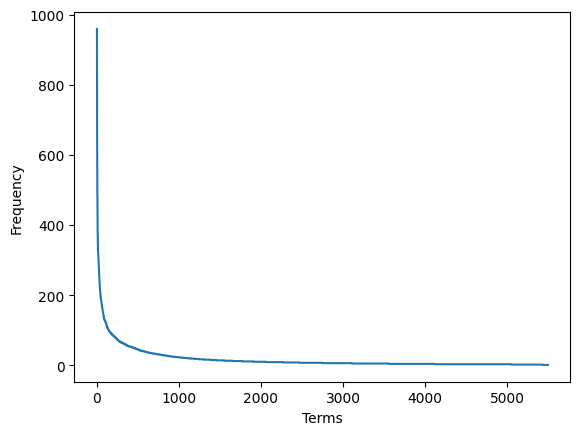

In [134]:
plt.plot(sorted(term_frequencies, reverse=True))
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.show()

_First, I loaded the txt dataset which was tab delemited as a dataframe using the pandas library read_csv which works on loading txt as well. Then I verified the imports with .head(10) to see the top 10 rows. Then I summed the term frequencies across all document for training data using row-wise operation axis=1. Then sorted the term frequencies in decending order and displayed top 20 terms. Then plotted the distribtution of term frequencies in the training data since using tf_sorted directly would still consist of the terms as index, I used sorted() to get just the frequencies which showed the Zipf distribution._

#### b. **[10 pts]** Create your own K-Nearest-Neighbor classifier function. Your classifier should allow as input the training data matrix, the training labels, the instance to be classified, the value of K (number of neighbors), and should return the predicted class for the instance and the indices of the top K neighbors. Your classifier should work with Euclidean distance as well as Cosine distance (which is 1 minus the Cosine similarity). You may create two separate classifiers, or add the distance metric as a parameter in the classifier function (an example implementation of a KNN classifier was provided in class examples). Show that your classifier works by running it on the first two instances in the test data using both Cosine and Euclidean distance in each case.

In [135]:
def knn_search(x, train_X, K, distance_metric):
    """ find K nearest neighbors of an instance x among the instances in train_X """
    if distance_metric == 0:
        # euclidean distances from the other points
        dists = np.sqrt(((train_X - x)**2).sum(axis=1))
    elif distance_metric == 1:
        # first find the vector norm for each instance in train_X as well as the norm for vector x
        train_X_norm = np.array([np.linalg.norm(train_X[i]) for i in range(len(train_X))])
        x_norm = np.linalg.norm(x)
        # Compute Cosine: divide the dot product of x and each instance in train_X by the product of the two norms
        cosine_sims = np.dot(train_X, x)/(train_X_norm * x_norm)
        # The distance measure will be the inverse of Cosine similarity
        dists = 1 - cosine_sims
    idx = np.argsort(dists) # sorting  
    # return the indexes of K nearest neighbors
    return idx[:K], dists

def knn_classify(x, train_X, K, labels, distance_metric):
    from collections import Counter
    neigh_idx, distances = knn_search(x, train_X, K, distance_metric)
    neigh_labels = labels[neigh_idx]
    # count how many neighbours belong to each class
    count = Counter(neigh_labels)
    print("Labels for top", K, "neighbors:", count)
    x_pred_class = count.most_common(1)[0][0]
    return x_pred_class, neigh_idx

In [136]:
# converting TD to DT
train_X = train_df.to_numpy().T  # (800, 5500)
test_X = test_df.to_numpy().T    # (200, 5500)

train_labels_y = train_labels_df.to_numpy().flatten()  # (800, )

first_test_instance = test_X[0]
second_test_instance = test_X[1]

In [137]:
for name, metric in [('Euclidean', 0), ('Cosine', 1)]:
    print(f'{name} distance:')
    pred_1, _ = knn_classify(first_test_instance, train_X, 5, train_labels_y, metric)
    pred_2, _ = knn_classify(second_test_instance, train_X, 5, train_labels_y, metric)
    print(f'First test instance prediction: {pred_1}')
    print(f'Second test instance prediction: {pred_2} \n')

Euclidean distance:
Labels for top 5 neighbors: Counter({np.int64(1): 5})
Labels for top 5 neighbors: Counter({np.int64(0): 3, np.int64(1): 2})
First test instance prediction: 1
Second test instance prediction: 0 

Cosine distance:
Labels for top 5 neighbors: Counter({np.int64(1): 5})
Labels for top 5 neighbors: Counter({np.int64(0): 5})
First test instance prediction: 1
Second test instance prediction: 0 



_Here, I implemented the KNN classifier function similar to the example shown in the class. Since we need the rows to be samples and columns to be features, so we transpose the train and test dataframe by converting them into numpy array. Then I used for loop to run the KNN classifier function on the first two instances in the test data using both Cosine and Euclidean distance in each case._

#### c. **[10 pts]** Create an evaluation function to measure the accuracy of your classifier. This function will call the classifier function in part a on all the test instances and in each case compares the actual test class label to the predicted class label. It should take as input the training data, the training labels, the test instances, the labels for test instances, and the value of K. Your evaluation function should return the Classification Accuracy (ratio of correct predictions to the number of test instances).

In [138]:
test_labels_y = test_labels_df.to_numpy().flatten()    

In [147]:
def classifier_eval(train_data, train_labels, test_data, test_labels, K, distance_metric):
    correct_pred = 0
    total_instances = len(test_data)
    for doc in range(total_instances):
        test_data_pred, _ = knn_classify(test_data[doc], train_data, K, train_labels, distance_metric)
        if train_labels[doc] == test_data_pred:
            correct_pred += 1
    return correct_pred/total_instances

_To create an evaluation funciton, I first converted the test labels into numpy array and flatten to create a 1D array similar to train lables I did in (b) since we need to compare the predicted labels to test labels to calulate the accuracy. Then I used the knn_classify function created in (b) to get the predictions and compared with the actual test prediction and summed the total correct predictions which is equivalent to the TP + TN. Then returned the Classification Accuracy which is ratio of correct predictions to the number of test instances._

#### d. **[10 pts]** Run your evaluation function on a range of values for K from 5 to 100 (in increments of 5) in order to compare accuracy values for different numbers of neighbors. Do this both using Euclidean Distance as well as Cosine similarity measure. Present the results as graphs with K in the x-axis and the evaluation metric (accuracy) on the y-axis. Use a single plot to compare the two version of the classifier (Euclidean distance version vs. cosine similarity version).

In [150]:
euclidean_distance = []
cosine_similarity = []
for K in range(5, 101, 5):
    euclidean_distance.append(classifier_eval(train_X, train_labels_y, test_X, test_labels_y, K, 0))
    cosine_similarity.append(classifier_eval(train_X, train_labels_y, test_X, test_labels_y, K, 1))

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100


In [ ]:
Ks